<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Jhonnathan Ordenes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

JhonnathanOrdenes
https://github.com/JhonnathanOrdenes/EIE_401_PROCESAMIENTO_DIGITAL_MULTIMEDIA

# Ayudantía
## 1.1 Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="scipy-signal-convolve-1.png"/></center>




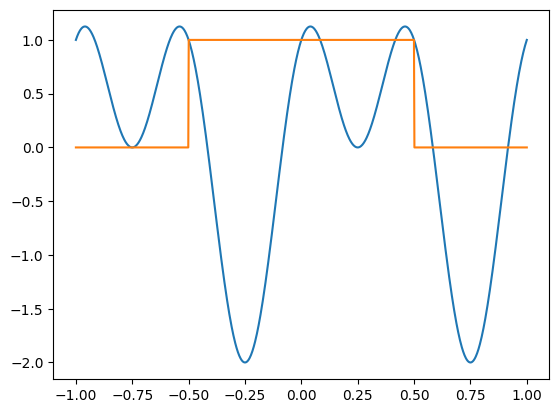

In [43]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

t = np.linspace(-1, 1, 1000) # Vector de tiempo
pulso = np.where(np.abs(t) < 0.5, 1.0, 0) # DUTY CICLE 50% AMPLITUD 1 MINIMO 0
trigo=y1 = np.cos(2 * np.pi * 2 * t)  + np.sin(2 * np.pi * 1* t) # Funcion de seno

plt.plot(t,trigo)
plt.plot(t,pulso)

convolucion=signal.convolve(pulso,trigo)

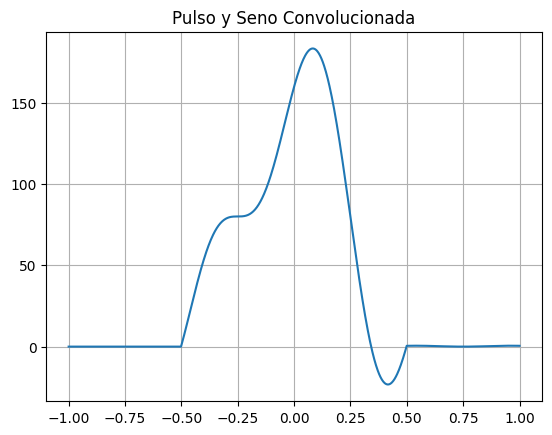

In [23]:
plt.plot(t,convolucion[0:1000])
plt.title("Pulso y Seno Convolucionada")
plt.grid()
plt.show()

## 1.2 Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.

In [44]:
from scipy.io import wavfile

# Cargar archivo .wav
sample_rate, data = wavfile.read('file_example_WAV_5MG.wav')


C:\Users\fried\AppData\Local\Temp\ipykernel_12728\147842673.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('file_example_WAV_5MG.wav')


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import scipy

Se vizualiza la forma de onda del archivo de audio.

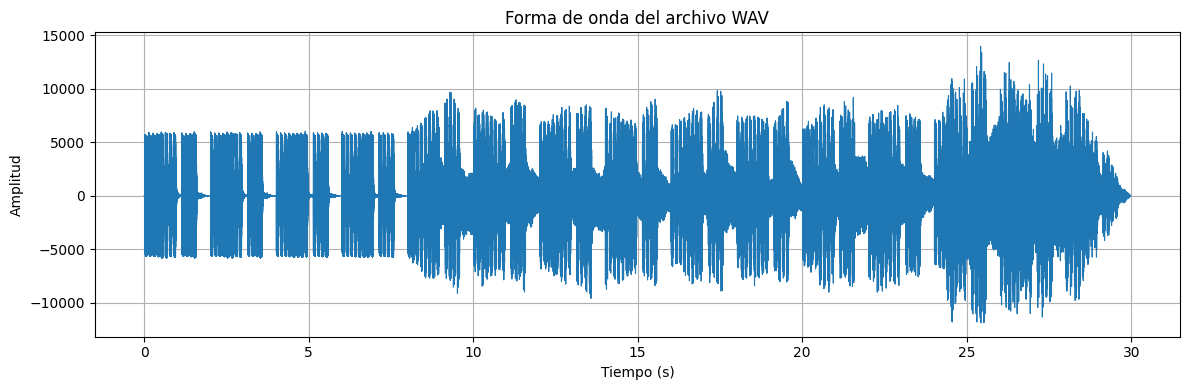

In [46]:
# Se transforma el audio de estereo a mono
if data.ndim > 1:
    data = data.mean(axis=1)

#  Crear eje de tiempo
duration = len(data) / sample_rate  # en segundos
time = np.linspace(0, duration, num=len(data))

# Graficar la forma de onda
plt.figure(figsize=(12, 4))
plt.plot(time, data, linewidth=0.8)
plt.title("Forma de onda del archivo WAV")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

Aplicamos la transformada rapida de Fourier a la señal

In [47]:
# . Aplicar FFT
n = len(data)
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(n, d=1/sample_rate)

# Quedarse solo con la mitad positiva
half_n = n // 2
fft_magnitude = np.abs(fft_result[:half_n])
frequencies = frequencies[:half_n]


Graficando el resultado se obtiene lo siguiente

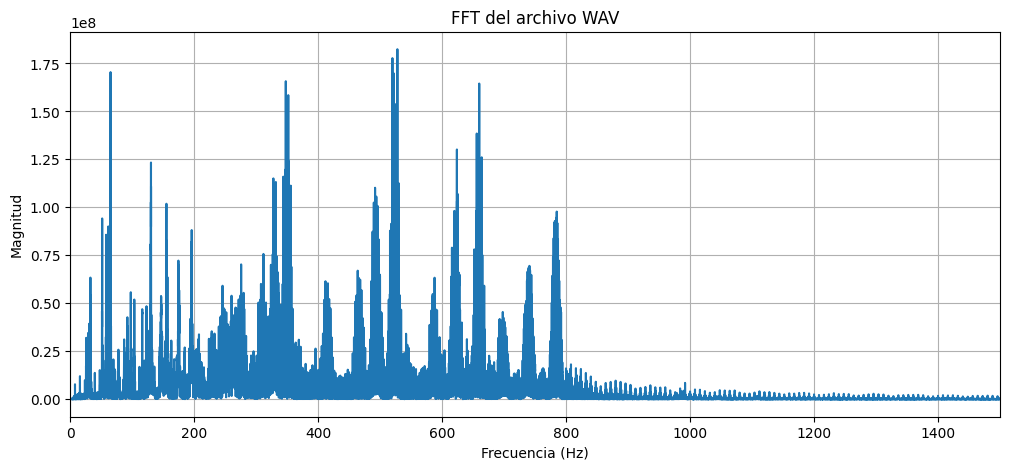

In [48]:
# Graficar
plt.figure(figsize=(12, 5))
plt.plot(frequencies, fft_magnitude)
plt.title("FFT del archivo WAV")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 1500)
plt.grid(True)
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


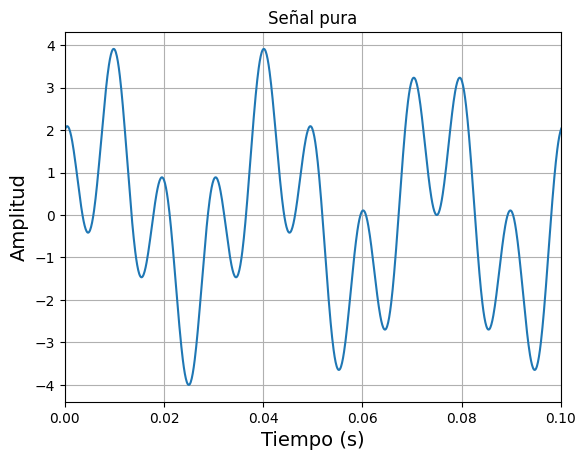

In [49]:
dt = 0.0001              # Tiempo de muestreo
t = np.arange(0,1,dt)              # Frecuencia de muestreo
w1 = 2 * np.pi * 30      
w2 = 2 * np.pi * 100     
f = 2 * np.sin(w1 * t) + 2 * np.cos(w2 * t) 
plt.plot(t, f)
plt.title("Señal pura")
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.xlim([0,0.1])
plt.grid()
plt.show()

Valor medio de la señal con ruido: 1.0006781198320962


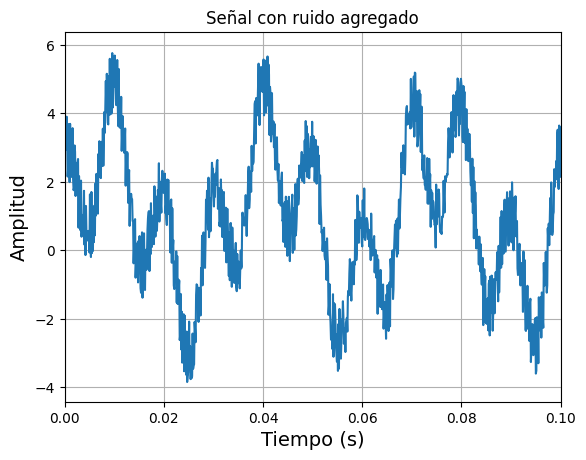

In [50]:
ruido = 2* np.random.random(len(t))               # Ruido aleatorio
fr = f + ruido   # Señal compuesta
promedio = np.mean(fr)
print(f"Valor medio de la señal con ruido: {promedio}")
plt.plot(t, fr)
plt.title("Señal con ruido agregado")
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.xlim([0,0.1])
plt.grid()
plt.show()

luego se aplica la FFT a fin de obtener la PSD de la señal en estudio.

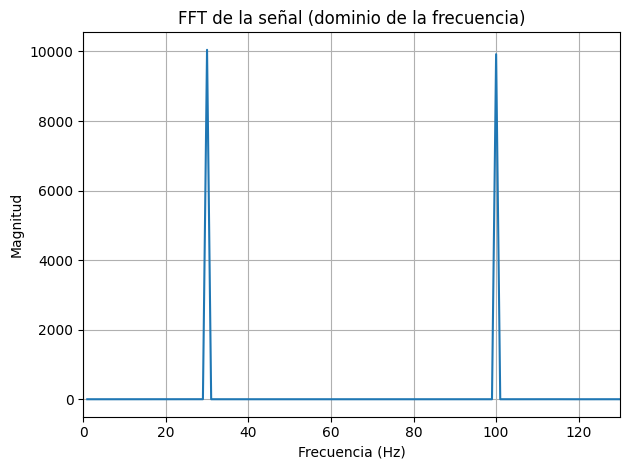

In [51]:
#Aplicamos FFT a esta señal
n = len(t)
fhat=fft(fr) #Calculamos la fft
PSD = fhat* np.conj(fhat)/n


freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


plt.plot(freq[L], PSD[L])
plt.title("FFT de la señal (dominio de la frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 130)  # Limita el eje X hasta 130 Hz
plt.grid()

plt.tight_layout()
plt.show()

Como se puede observar claramente del grafico anterior los peaks de energia en la señal se encuentran en los 30 y los 100 Hz, teniendo una amplitud visiblemente grande.

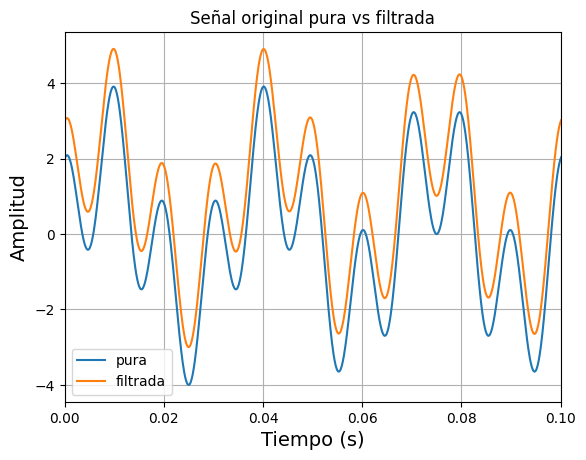

In [52]:

## Use the PSD to filter out noise
indices = PSD > 1000       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal
plt.plot(t,f, label='pura')
plt.plot(t,ffilt, label='filtrada')
plt.title("Señal original pura vs filtrada")
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.xlim([0,0.1])
plt.grid(True)
plt.legend()

Finalmente luego de filtrar la señal con el ruido agregado se tiene la reconstruccion de la señal pura original presentando un pequeño offset en la magnitud de esta, pero manteniendo todas las caracteristicas de la señal original.

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [53]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    # Shift de x por mu
    x_shifted = x - mu
    
    # Constante de normalización
    coef = 2 / (np.sqrt(3 * sigma) * np.pi**0.25)
    
    # Fórmula de la wavelet Mexican Hat
    term = (1 - (x_shifted**2) / (sigma**2))
    gauss = np.exp(-x_shifted**2 / (2 * sigma**2))
    
    return coef * term * gauss


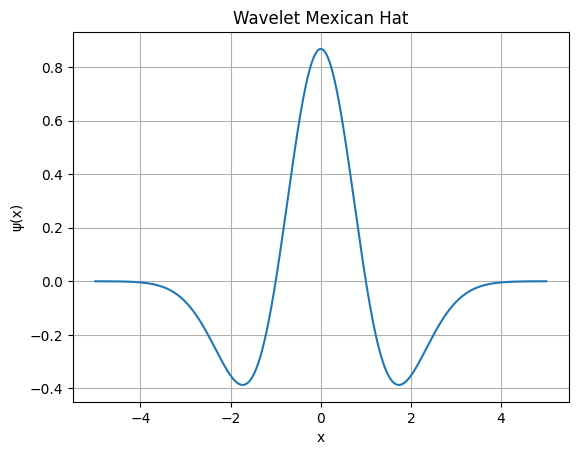

In [54]:
# Dominio
x = np.linspace(-5, 5, 1000)
mu = 0       # centro de la wavelet
sigma = 1.0  # ancho (escala)

# Evaluar y graficar
y = mexican_hat(x, mu, sigma)

plt.plot(x, y)
plt.title("Wavelet Mexican Hat")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.grid(True)
plt.show()

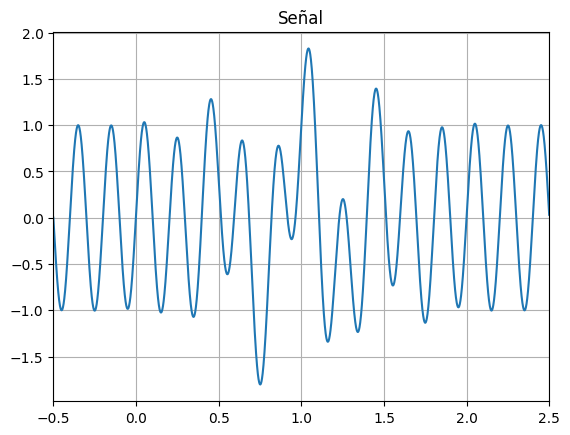

In [55]:
#Generar una señal
dt = 0.001
t = np.arange(-0.5, 2.5, dt)
f = np.sin(2 * np.pi * 5 * t) + signal.gausspulse(t - 1, fc=2)
plt.plot(t,f)
plt.title("Señal")
plt.xlim(-0.5,2.5)
plt.grid()

In [56]:
#Calcular la CWT
scales = np.linspace(0.05, 0.5, 40)  # diferentes valores de sigma (escala)
cwt_matrix = []


for sigma in scales:
    cwt_row = []
    for mu in t:
        wavelet = mexican_hat(t, mu, sigma)
        coef = np.sum(f * wavelet) * dt
        cwt_row.append(coef)
    cwt_matrix.append(cwt_row)

cwt_matrix = np.array(cwt_matrix)
cwtmatr_yflip = np.flipud(cwt_matrix)

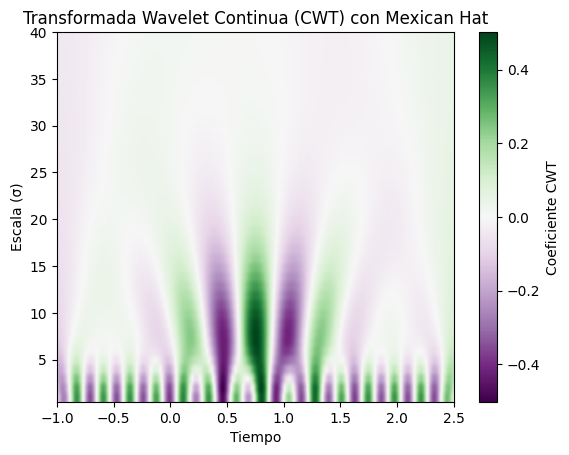

In [57]:
#Mostrar el resultado como un espectrograma wavelet
plt.imshow(cwtmatr_yflip, extent=[-1, 2.5, 0.5, 40], aspect='auto', cmap='PRGn')
plt.colorbar(label='Coeficiente CWT')
plt.xlabel("Tiempo")
plt.ylabel("Escala (σ)")
plt.title("Transformada Wavelet Continua (CWT) con Mexican Hat")
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

In [64]:
# --- Parámetros base ---
a0 = 2
b0 = 1
m = 1  # Nivel de la wavelet
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Vector temporal

f = np.sin(2 * np.pi * 50 * t) + 0.5 * np.cos(2 * np.pi * 120 * t) + 0.2 * np.random.randn(len(t))

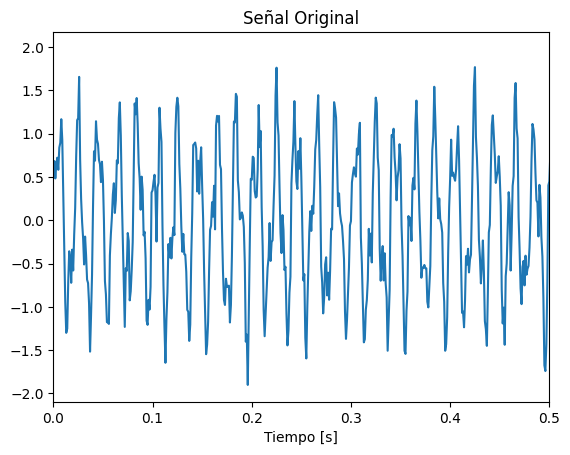

In [65]:
plt.plot(t, f)
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.xlim(0,0.5)
plt.show()

In [66]:
# --- Transformada wavelet discreta para un nivel ---
def wavelet_transform_discreta(f, t, a0, b0, m):
    a = a0 ** m
    T = []

    for n in range(len(t)):
        b = n * b0 * a  # b = n * b0 * a0^m
        sigma = a  # Asumimos que sigma = a0^m
        psi_mn = a0 ** (-m / 2) * mexican_hat(t, mu=b, sigma=sigma)
        Tmn = np.sum(f * psi_mn) * (t[1] - t[0])  # Aproximación de la integral
        T.append(Tmn)

    return np.array(T)

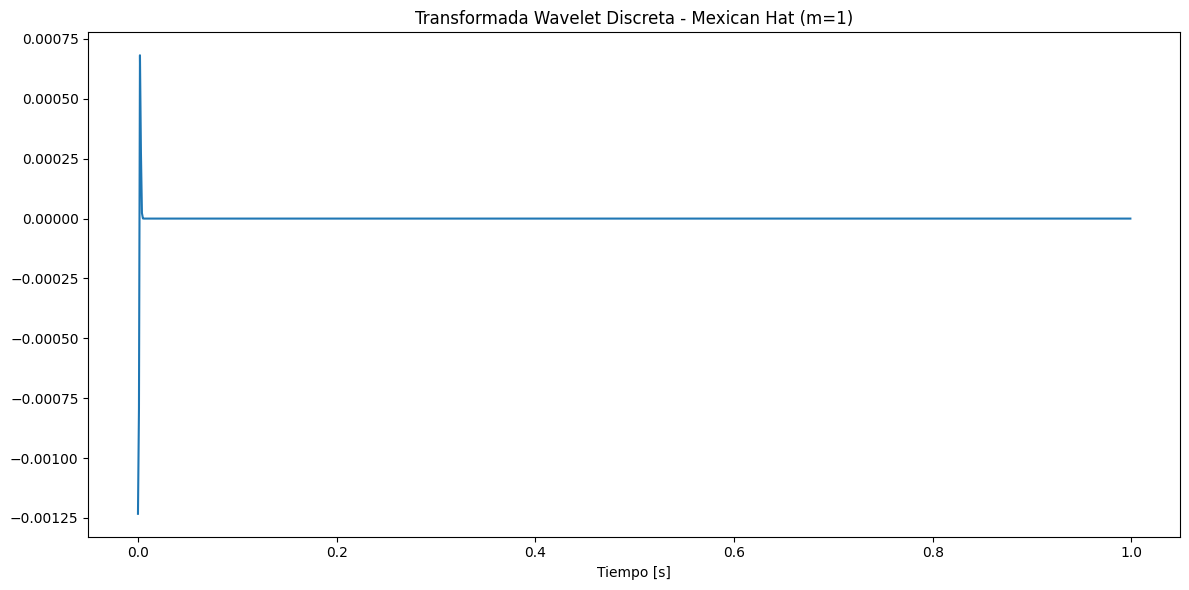

In [67]:
# --- Ejecutar la transformada ---
T_mn = wavelet_transform_discreta(f, t, a0, b0, m)

# --- Visualización ---
plt.figure(figsize=(12, 6))
plt.plot(t, T_mn)
plt.title(f"Transformada Wavelet Discreta - Mexican Hat (m={m})")
plt.xlabel("Tiempo [s]")

plt.tight_layout()
plt.show()


###  3.2.1. Explica el siguiente fragmento de código en detalle

Este código ilustra visualmente cómo se construyen las wavelets discretas en distintos niveles y posiciones.

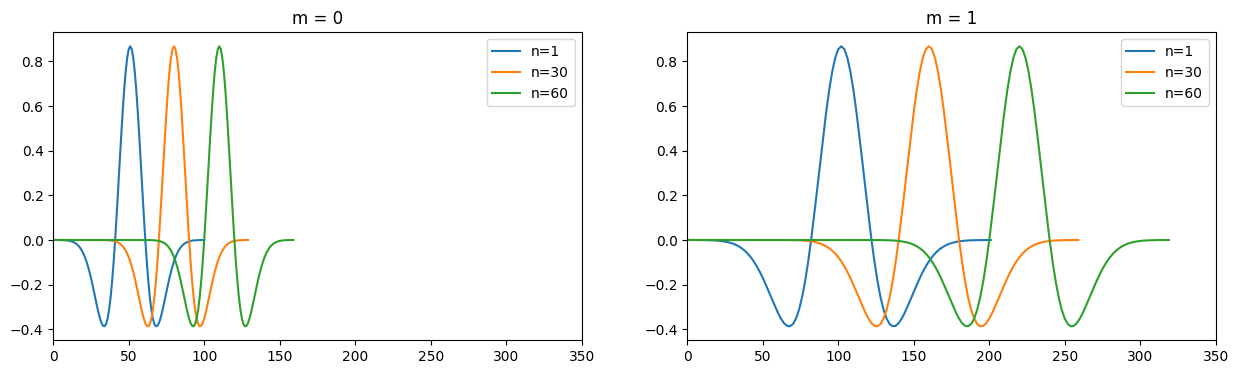

In [70]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m # Factor de escalado de la wavelet 
    b = n*2**m # Posicion de la wavelet
    wav = np.zeros(len(psi)*a + b) # Calcula el tamaño del escalamiento de la Wavelet
    # Prepara un arreglo de ceros para alojar la wavelet escalada y desplazada b posiciones
    # e interpola la wavelet original a fin de reescalar la wavelet de forma lineal
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    # coloca la wavelet dentro del arreglo empezando en la posicion b
    return wav 

# Utiliza la funcion mexican hat wavelet definida en el punto 3.1
# evaluanda en el intervalo [-5,5] con pasos de 0.1 y establece el mu = 0 y sigma = 1
psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350) # Establece los limites del eje X
ns = [1, 30, 60] #Se establece un arreglo con las posciones de los desplazamientos
ms = [0, 1] #Se establece el arreglo con los niveles a calcular de la wavelet

#Se generan las graficas de las wavelets
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


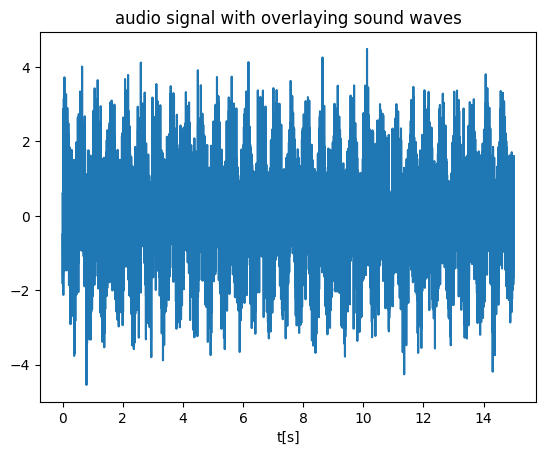

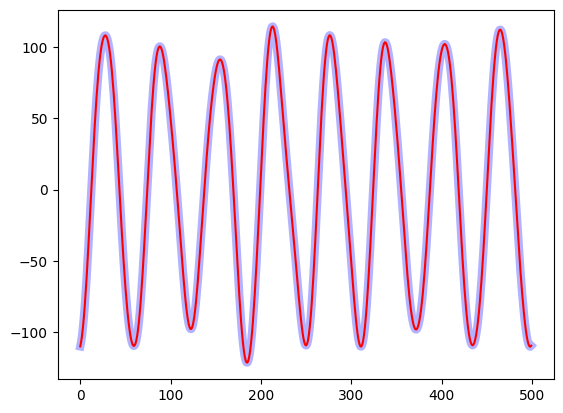

In [71]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    a = 2**m
    b = n * a
    psi_scaled = psi_mn(psi, m, n)
    if b + len(psi)*a > len(f):
        return 0  # Evita desbordamiento

    # Calcular solo en la sección donde se traslapa
    section_f = f[b : b + len(psi)*a]
    section_psi = psi_scaled[b : b + len(psi)*a]
    transform_scaled = np.sum(section_f * section_psi)
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    psi_full = psi_mn(psi, m, n)
    if len(psi_full) > len(f):
        # Rellenar la señal para que coincidan longitudes
        f_padded = np.pad(f, (0, len(psi_full) - len(f)), mode='constant')
    else:
        f_padded = f[:len(psi_full)]

    transform = np.sum(f_padded * psi_full)
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.3 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [72]:
import pywt

# URL del dataset
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

# Descargar y cargar datos directamente desde URL
data = np.loadtxt(url)
time = np.arange(len(data))  # eje de tiempo (puede ser en meses)

In [73]:
# Escalas: elegimos un rango (ajustable)
scales = np.arange(1, 128)

# Aplicar CWT usando wavelet compleja Morlet ('cmor')
coef, freqs = pywt.cwt(data, scales, 'cmor', sampling_period=1)
power = np.abs(coef) ** 2  # potencia en cada (escala, tiempo)


C:\Users\fried\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


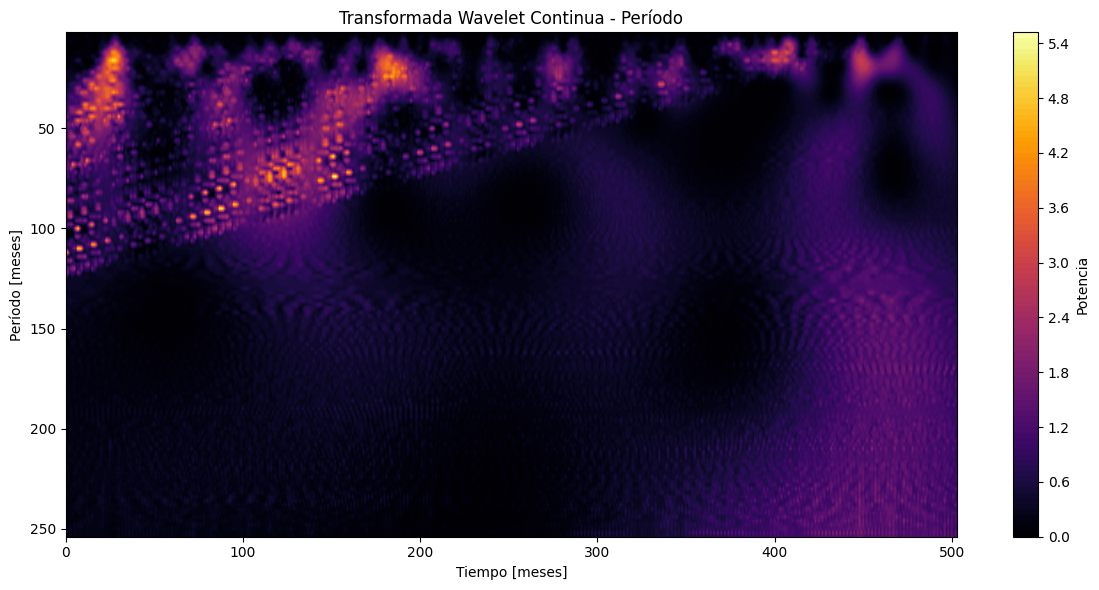

In [74]:
periods = 1 / freqs

plt.figure(figsize=(12, 6))
plt.contourf(time, periods, power, levels=100, cmap='inferno')
plt.xlabel("Tiempo [meses]")
plt.ylabel("Período [meses]")
plt.title("Transformada Wavelet Continua - Período")
plt.gca().invert_yaxis()  # Período más largo arriba
plt.colorbar(label="Potencia")
plt.tight_layout()
plt.show()


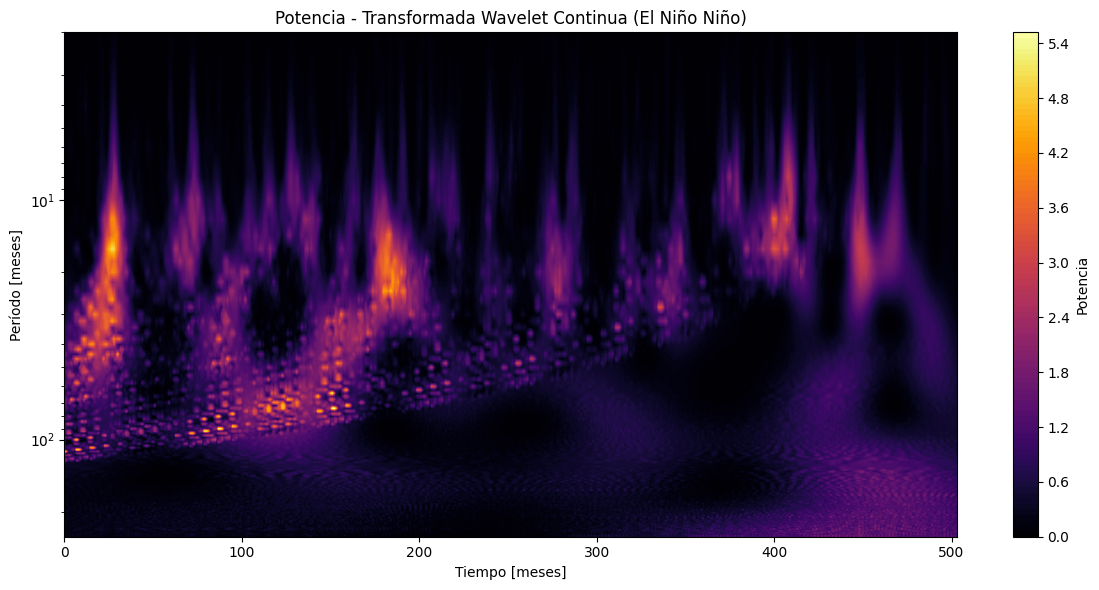

In [75]:
plt.figure(figsize=(12, 6))
contour = plt.contourf(time, periods, power, levels=100, cmap='inferno')  # 100 niveles
plt.xlabel("Tiempo [meses]")
plt.ylabel("Período [meses]")
plt.title("Potencia - Transformada Wavelet Continua (El Niño Niño)")
plt.yscale('log')  # escalado logarítmico en períodos (opcional pero informativo)
plt.gca().invert_yaxis()  # períodos largos arriba
plt.colorbar(contour, label="Potencia")
plt.tight_layout()
plt.show()

### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico de contorno representa la potencia de la señal (energía localizada) en función del tiempo (eje X) y del período en meses (eje Y). Donde los colores mas calidos indican una mayor potencia y los mas oscuros indican menor potencia.

Para este caso se puede observar que los puntos de mayor potencia son meses en los que se presenciaron altas temperaturas con mayor frecuencia, lo que correspodientes al fenomeno del Niño, mientras que los espacios oscuros o con menor potencia indican temperaturas mas bajas. Tambien se puede notar que no hay componentes de alta frecuencia que sean relevantes, lo que es consistente para un fenomeno natural. 



## 4. Obtén el espectrograma de tu señal de audio
Sobre la señal de audio en el punto 1 de la actividad, debe presentar el espectragrama


C:\Users\fried\AppData\Local\Temp\ipykernel_12728\936573238.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('file_example_WAV_5MG.wav')


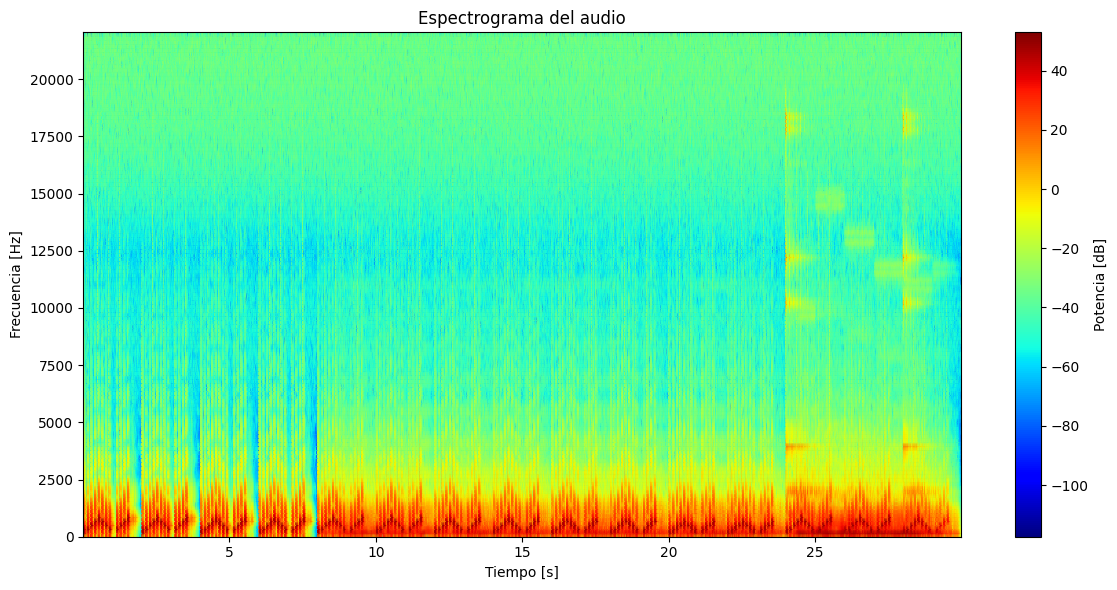

In [76]:
from scipy.signal import spectrogram
# Cargar archivo .wav
sample_rate, data = wavfile.read('file_example_WAV_5MG.wav')

# Se transforma el audio de estereo a mono
if data.ndim > 1:
    data = data.mean(axis=1)

# Calcular el espectrograma
frequencies, times, Sxx = spectrogram(data, fs=sample_rate)

# Graficar el espectrograma
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='jet')
plt.colorbar(label='Potencia [dB]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Espectrograma del audio')
plt.tight_layout()
plt.show()

## 5. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y fragmentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


In [77]:
def fragment_audio(signal, sample_rate, slice_duration_sec, overlap_samples):
    slice_len = int(slice_duration_sec * sample_rate)
    step = slice_len  # avance entre fragmentos (sin contar overlaps)
    
    slices = []
    i = 0
    
    while i < len(signal):
        # Cálculo de los índices con overlap
        start = max(0, i - overlap_samples)
        end = min(len(signal), i + slice_len + overlap_samples)
        
        slice_chunk = signal[start:end]
        slices.append(slice_chunk)
        
        i += step  # avanzar el tamaño del fragmento original (sin contar overlaps)
    
    print(f"Se generaron {len(slices)} fragmentos.")
    for idx, fragment in enumerate(slices):
        print(f"Fragmento {idx + 1}: índice inicial = {max(0, idx * step - overlap_samples)}, "
              f"longitud = {len(fragment)} muestras")
    return slices



In [78]:
# Fragmentar audio en slices de 2 segundos, con 100 muestras de overlap a cada lado
slice_duration_sec = 2.0
overlap_samples = 100

slices = fragment_audio(data, sample_rate, slice_duration_sec, overlap_samples)


Se generaron 15 fragmentos.
Fragmento 1: índice inicial = 0, longitud = 88300 muestras
Fragmento 2: índice inicial = 88100, longitud = 88400 muestras
Fragmento 3: índice inicial = 176300, longitud = 88400 muestras
Fragmento 4: índice inicial = 264500, longitud = 88400 muestras
Fragmento 5: índice inicial = 352700, longitud = 88400 muestras
Fragmento 6: índice inicial = 440900, longitud = 88400 muestras
Fragmento 7: índice inicial = 529100, longitud = 88400 muestras
Fragmento 8: índice inicial = 617300, longitud = 88400 muestras
Fragmento 9: índice inicial = 705500, longitud = 88400 muestras
Fragmento 10: índice inicial = 793700, longitud = 88400 muestras
Fragmento 11: índice inicial = 881900, longitud = 88400 muestras
Fragmento 12: índice inicial = 970100, longitud = 88400 muestras
Fragmento 13: índice inicial = 1058300, longitud = 88400 muestras
Fragmento 14: índice inicial = 1146500, longitud = 88400 muestras
Fragmento 15: índice inicial = 1234700, longitud = 87553 muestras


## 5.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


In [79]:
import torch

In [ ]:
def fragment_audio_torch(signal, sample_rate, slice_duration_sec, overlap_samples):
    signal = torch.tensor(signal, dtype=torch.float32)
    slice_len = int(slice_duration_sec * sample_rate)
    step = slice_len  # sin superposición en el paso, la superposición se añade manualmente

    slices = []
    i = 0

    while i < len(signal):
        start = max(0, i - overlap_samples)
        end = min(len(signal), i + slice_len + overlap_samples)
        slice_chunk = signal[start:end]
        slices.append(slice_chunk)
        i += step

    print(f"Se generaron {len(slices)} fragmentos en total.\n")
    for idx, fragment in enumerate(slices):
        start_index = max(0, idx * step - overlap_samples)
        print(f"Fragmento {idx + 1}: índice inicial = {start_index}, longitud = {len(fragment)} muestras")

    return slices

In [81]:
#Parámetros
slice_duration_sec = 2.0       # duración de cada fragmento en segundos
overlap_samples = 100          # solapamiento a cada lado (en muestras)

# Ejecutar fragmentación en PyTorch
slices = fragment_audio_torch(data, sample_rate, slice_duration_sec, overlap_samples)

Se generaron 15 fragmentos en total.

Fragmento 1: índice inicial = 0, longitud = 88300 muestras
Fragmento 2: índice inicial = 88100, longitud = 88400 muestras
Fragmento 3: índice inicial = 176300, longitud = 88400 muestras
Fragmento 4: índice inicial = 264500, longitud = 88400 muestras
Fragmento 5: índice inicial = 352700, longitud = 88400 muestras
Fragmento 6: índice inicial = 440900, longitud = 88400 muestras
Fragmento 7: índice inicial = 529100, longitud = 88400 muestras
Fragmento 8: índice inicial = 617300, longitud = 88400 muestras
Fragmento 9: índice inicial = 705500, longitud = 88400 muestras
Fragmento 10: índice inicial = 793700, longitud = 88400 muestras
Fragmento 11: índice inicial = 881900, longitud = 88400 muestras
Fragmento 12: índice inicial = 970100, longitud = 88400 muestras
Fragmento 13: índice inicial = 1058300, longitud = 88400 muestras
Fragmento 14: índice inicial = 1146500, longitud = 88400 muestras
Fragmento 15: índice inicial = 1234700, longitud = 87553 muestras

## 6. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio, para diferentes ordenes y niveles de rizado.
Muestra gráficos con las diferentes respuestas del filtro butterworth y explica el resultado. 

In [86]:
from scipy.signal import butter, filtfilt, freqz
# Normalizar la señal (opcional pero recomendado)
data = data / np.max(np.abs(data))

# Función para filtro Butterworth ===
def butterworth_filter(data, cutoff_freq, sample_rate, order):
    nyquist = 0.5 * sample_rate
    norm_cutoff = cutoff_freq / nyquist
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, data)
    return filtered, b, a

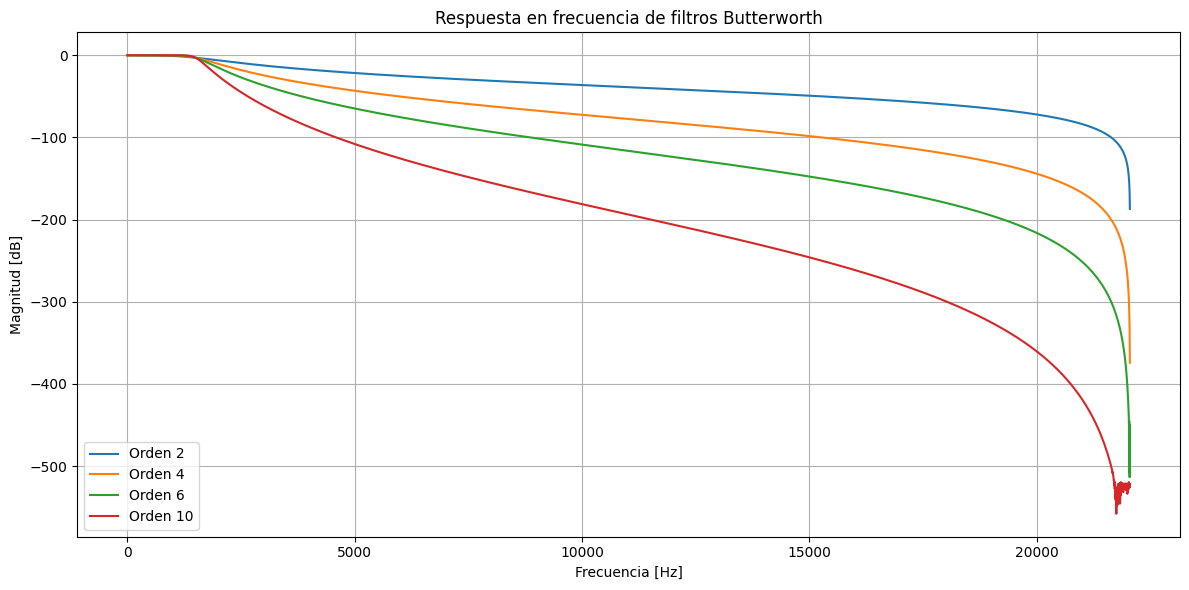

In [100]:
#Parámetros de prueba
cutoff_freq = 1500  # Hz
orders = [2, 4, 6, 10]

# Graficar respuestas en frecuencia de los filtros ===
plt.figure(figsize=(12, 6))
for order in orders:
    b, a = butter(order, cutoff_freq / (0.5 * sample_rate), btype='low')
    w, h = freqz(b, a, worN=8000)
    plt.plot((sample_rate * 0.5 / np.pi) * w, 20 * np.log10(np.abs(h)), label=f"Orden {order}")
plt.title("Respuesta en frecuencia de filtros Butterworth")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

El filtro Butterworth tiene una respuesta suave y monotónica.

Se puede apreciar que a mayor orden, la caída es más abrupta en la frecuencia de corte. Y no hay rizado (ripple) ni en la banda pasante ni en la banda de rechazo.

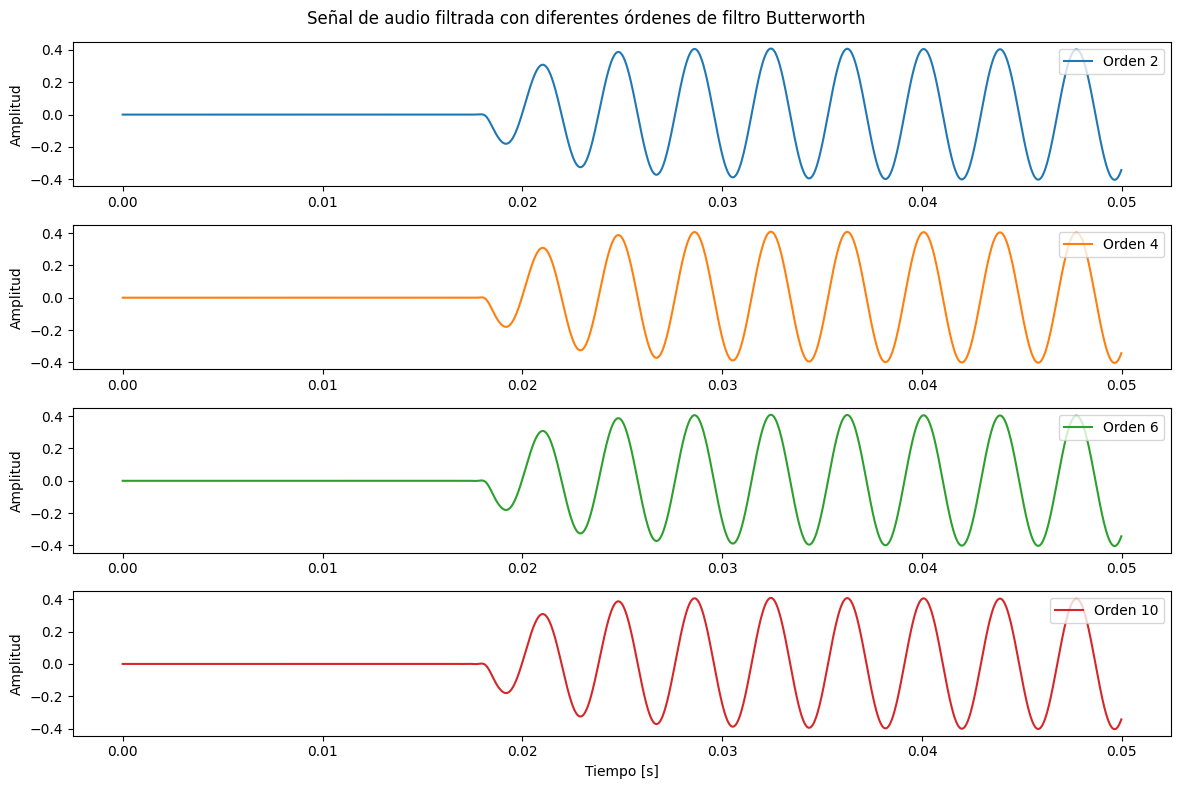

In [101]:
# Aplicar filtros y graficar señal ===
plt.figure(figsize=(12, 8))
duration = 0.05  # en segundos
samples_to_plot = int(duration * sample_rate)
t = np.arange(samples_to_plot) / sample_rate

for i, order in enumerate(orders):
    filtered, _, _ = butterworth_filter(data, cutoff_freq, sample_rate, order)
    plt.subplot(len(orders), 1, i+1)
    plt.plot(t, filtered[:samples_to_plot], label=f"Orden {order}", color='C'+str(i))
    plt.ylabel("Amplitud")
    plt.legend(loc="upper right")

plt.xlabel("Tiempo [s]")
plt.suptitle("Señal de audio filtrada con diferentes órdenes de filtro Butterworth")
plt.tight_layout()
plt.show()

Para esta señal al ser procesada por el filtro, se observa que a mayor orden del filtro, mas abrupta es la respuesta inicial, pero de todas formas tiene una respuesta suave, ya que las frecuencias dentro de la señal utilizada se encuentran completamente dentro del rango de frecuencia del filtro.


## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
